In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '~/caffe/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = './project/cnn-speech-denoising/models/model0/ae_noisy_to_clean.f100.s5.t100.lr.0001.g.9.reg0.00001.iter1000.aug0.nn_c7x7.24_r_c7x7.24_r_c7x7.24_r_c7x7.24_r_c7x7.1.prototxt'
PRETRAINED = './project/cnn-speech-denoising/models/model0/snapshots/ae_noisy_to_clean.f100.s5.t100.lr.0001.g.9.reg0.00001.iter1000.aug0.nn_c7x7.24_r_c7x7.24_r_c7x7.24_r_c7x7.24_r_c7x7.1_iter_1001.caffemodel'

In [2]:
# train is 0, test is 1

In [14]:
# caffe.set_mode_cpu()
net = caffe.Net(MODEL_FILE, PRETRAINED, 0)
output = net.forward()

In [15]:
print net.blobs.keys()

['data', 'label', 'c0', 'r1', 'c2', 'r3', 'c4', 'r5', 'c6', 'r7', 'final_output', 'l2_error']


In [16]:
before = net.blobs['data'].data
target = net.blobs['label'].data
after = net.blobs['final_output'].data
print before.shape, target.shape, after.shape

(10, 1, 100, 257) (10, 1, 100, 257) (10, 1, 100, 257)


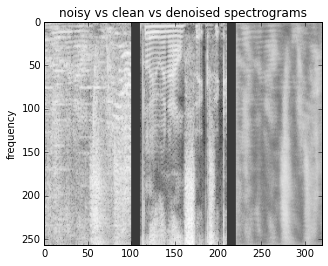

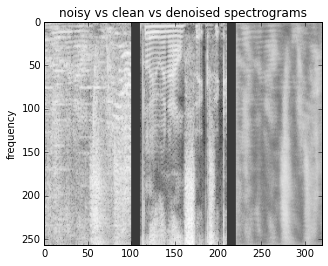

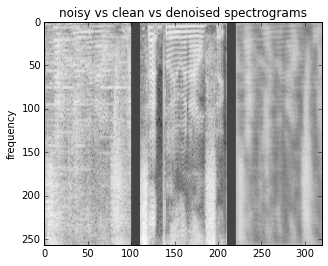

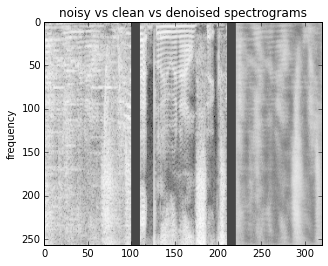

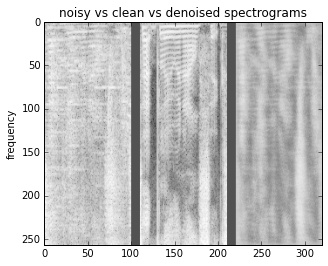

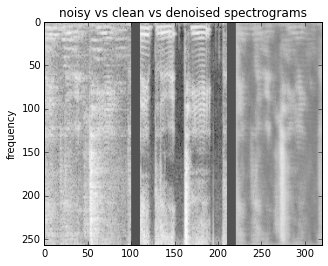

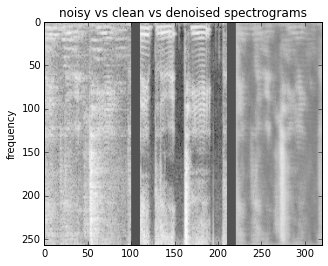

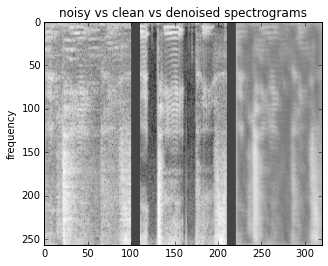

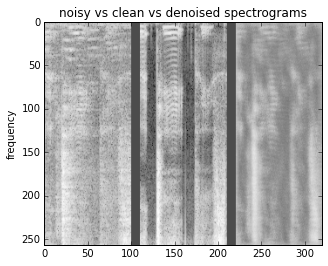

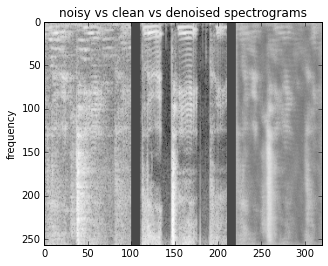

In [30]:
import matplotlib.pylab as P
import matplotlib.cm as cm

divider = np.ones((257, 10)) * -5

for i in range(10):
    x = before[i, 0, :, :].T
    y = target[i, 0, :, :].T
    z = after[i, 0, :, :].T
    P.imshow(np.concatenate([x, divider, y, divider, z], axis=1), cmap = cm.Greys_r)
    P.ylabel('frequency')
    P.title('noisy vs clean vs denoised spectrograms')
    P.show()